<a href="https://colab.research.google.com/github/kangdy25/Python_DataAnalysis/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API 인증키 발급 및 데이터 수집

In [2]:
import requests
api_key = "56745742696b616e3132347653416473"
url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/100/"

responses = []

params = {
 'serviceKey': api_key,
 'returnType': 'json',
 'numOfRows': '100',
 'pageNo': '1',
 'sidoName': '서울',
 'ver': '1.0'
}

def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1,12+1):
            year_months.append(f'{year}/{month:02d}')
    return year_months

responses = []
all_success = True

for year_month in get_year_months():
    response = requests.get(url+year_month, params=params)
    if response.status_code == 200:
        rows = (response.json()['energyUseDataSummaryInfo']['row'])
        for row in rows:
            if (row['MM_TYPE'] != '개인'):
                continue
            responses.append(row)
    else:
        print(f"API 호출 실패: {response.status_code}")
        all_success = False

if all_success:
    print("api 호출 성공")
    print(responses)

api 호출 성공
[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'CNT': '774620', 'EUS': '189974230', 'EUS1': '193611430', 'EUS2': '200055533', 'ECO2_1': '-6859251.5', 'ECO2_2': '-2908322.636', 'GUS': '56487358', 'GUS1': '59353536', 'GUS2': '66191173', 'GCO2_1': '-6284996.5', 'GCO2_2': '-14078392.16', 'WUS': '12656888.218', 'WUS1': '12713146.172', 'WUS2': '12948410.081', 'WCO2_1': '-173889.9085', 'WCO2_2': '-57731.449622', 'HUS': '18793320.2

In [3]:
print(responses)


[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '02', 'MM_TYPE': '개인', 'CNT': '774620', 'EUS': '189974230', 'EUS1': '193611430', 'EUS2': '200055533', 'ECO2_1': '-6859251.5', 'ECO2_2': '-2908322.636', 'GUS': '56487358', 'GUS1': '59353536', 'GUS2': '66191173', 'GCO2_1': '-6284996.5', 'GCO2_2': '-14078392.16', 'WUS': '12656888.218', 'WUS1': '12713146.172', 'WUS2': '12948410.081', 'WCO2_1': '-173889.9085', 'WCO2_2': '-57731.449622', 'HUS': '18793320.213', 'HUS1

In [4]:
import pandas as pd

data = responses
df = pd.DataFrame(data)
df

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,02,개인,774620,189974230,193611430,200055533,-6859251.5,-2908322.636,56487358,...,12713146.172,12948410.081,-173889.9085,-57731.449622,18793320.213,19032221.757,21414367.325,-1429974.328,-17311712.76832,2015-06-04 16:59:30.0
2,2015,03,개인,783726,175215719,177160755,182354932,-5541536.5,-2349611.476,49984873,...,12649879.288,12668246.94,-3588.865,-1191.50318,13826348.508,12628762.116,14509117.099,257408.9005,11088622.213667,2015-06-12 04:00:01.0
3,2015,04,개인,798971,183891769,187268491,193988954,-6736953.5,-2856468.284,37306841,...,13016364.788,13153635.106,-130226.701,-43235.264732,5836002.885,5534118.758,8275382.274,-1068747.631,-27674867.802062,2015-07-05 04:00:00.0
4,2015,05,개인,810422,177289769,181972266,188230004,-7811366,-3312019.184,22060892,...,13214349.918,13186433.49,-113657.49,-37734.28668,1320895.801,1558697.648,1709192.194,-313049.12,-5190153.166471,2015-08-05 04:00:01.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024,08,개인,1242696,463971328,422847493,405133667,49980748,27164821.792,7072251,...,15899281.6,16383386.2,-267789.3,-227512.116,130082.263,131589.763,131798.413,-1611.825,-1073.761514,2024-11-01 04:04:00.0
116,2024,09,개인,1247288,409872908,342666115,310147714,83465993.5,55322607.868,5729131,...,15233981.2,15608153.2,-277745.6,-760889.978,3420507.136,3427066.313,3432770.307,-9411.174,-25382.3841398,2024-12-01 04:02:35.0
117,2024,10,개인,1249966,282268119,264132620,263389786,18506916,14379201.216,8233421,...,15372349.4,15520212.2,-148610.9,-189025.694,2695491.396,3326775.236,4339830.387,-1137811.4155,-1573249.33785276,2025-01-01 04:02:38.0
118,2024,11,개인,1251707,257927956,263362159,265181268,-6343757.5,-4509835.42,17418221,...,14789968.4,15060759.3,-246691.35,-261007.97,8836296.454,12932546.397,10390187.837,-2825070.663,-3892157.038064492,2025-02-01 04:02:31.0


In [5]:
import pandas as pd

data = responses
df = pd.DataFrame(data)

for i in range(len(df)):
    if 3 <= int(df.loc[i, 'MON']) <= 5:
        df.loc[i, 'season'] = '봄'
    elif 6 <= int(df.loc[i, 'MON']) <= 8:
        df.loc[i, 'season'] = '여름'
    elif 9 <= int(df.loc[i, 'MON']) <= 11:
        df.loc[i, 'season'] = '가을'
    elif (1 <= int(df.loc[i, 'MON']) <= 2) | (int(df.loc[i, 'MON']) == 12):
        df.loc[i, 'season'] = '겨울'

df

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE,season
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0,겨울
1,2015,02,개인,774620,189974230,193611430,200055533,-6859251.5,-2908322.636,56487358,...,12948410.081,-173889.9085,-57731.449622,18793320.213,19032221.757,21414367.325,-1429974.328,-17311712.76832,2015-06-04 16:59:30.0,겨울
2,2015,03,개인,783726,175215719,177160755,182354932,-5541536.5,-2349611.476,49984873,...,12668246.94,-3588.865,-1191.50318,13826348.508,12628762.116,14509117.099,257408.9005,11088622.213667,2015-06-12 04:00:01.0,봄
3,2015,04,개인,798971,183891769,187268491,193988954,-6736953.5,-2856468.284,37306841,...,13153635.106,-130226.701,-43235.264732,5836002.885,5534118.758,8275382.274,-1068747.631,-27674867.802062,2015-07-05 04:00:00.0,봄
4,2015,05,개인,810422,177289769,181972266,188230004,-7811366,-3312019.184,22060892,...,13186433.49,-113657.49,-37734.28668,1320895.801,1558697.648,1709192.194,-313049.12,-5190153.166471,2015-08-05 04:00:01.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024,08,개인,1242696,463971328,422847493,405133667,49980748,27164821.792,7072251,...,16383386.2,-267789.3,-227512.116,130082.263,131589.763,131798.413,-1611.825,-1073.761514,2024-11-01 04:04:00.0,여름
116,2024,09,개인,1247288,409872908,342666115,310147714,83465993.5,55322607.868,5729131,...,15608153.2,-277745.6,-760889.978,3420507.136,3427066.313,3432770.307,-9411.174,-25382.3841398,2024-12-01 04:02:35.0,가을
117,2024,10,개인,1249966,282268119,264132620,263389786,18506916,14379201.216,8233421,...,15520212.2,-148610.9,-189025.694,2695491.396,3326775.236,4339830.387,-1137811.4155,-1573249.33785276,2025-01-01 04:02:38.0,가을
118,2024,11,개인,1251707,257927956,263362159,265181268,-6343757.5,-4509835.42,17418221,...,15060759.3,-246691.35,-261007.97,8836296.454,12932546.397,10390187.837,-2825070.663,-3892157.038064492,2025-02-01 04:02:31.0,가을


In [ ]:
# 한글 처리를 위한 matplotlib 설정 (1) -> 실행 이후 세션 다시 시작

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

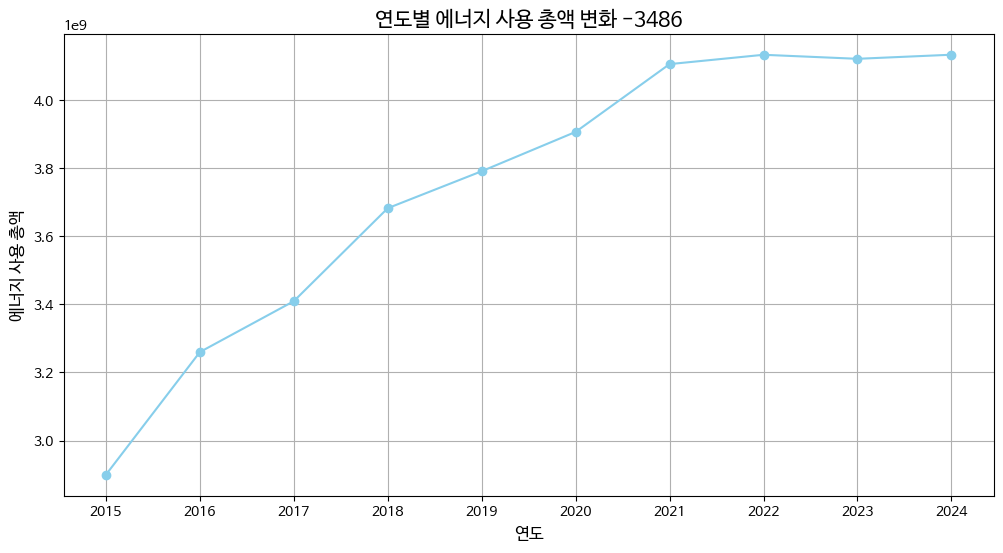

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 문자열인 데이터를 숫자형으로 바꾸는 코드
for col in ['EUS', 'GUS', 'WUS', 'HUS']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['total_cost'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']

yearly_energy = df.groupby('YEAR')['total_cost'].sum().reset_index()

x = yearly_energy['YEAR']
y = yearly_energy['total_cost']

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', color='skyblue')

# 그래프 설정
plt.title("연도별 에너지 사용 총액 변화 - 3486", fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('에너지 사용 총액', fontsize=12)
plt.grid(True)
plt.show()

그래프를 보면 2015년부터 2021년까지 에너지 사용량이 급격히 늘고, 2021년 이후에는 증가 폭이 완만해져 일정하게 유지되고 있음을 알 수 있다. 2021~2024년에는 코로나19로 외부 활동과 공동시설 이용이 줄면서 사용량 증가세가 완만해진 것으로 보인다.

<BarContainer object of 4 artists>

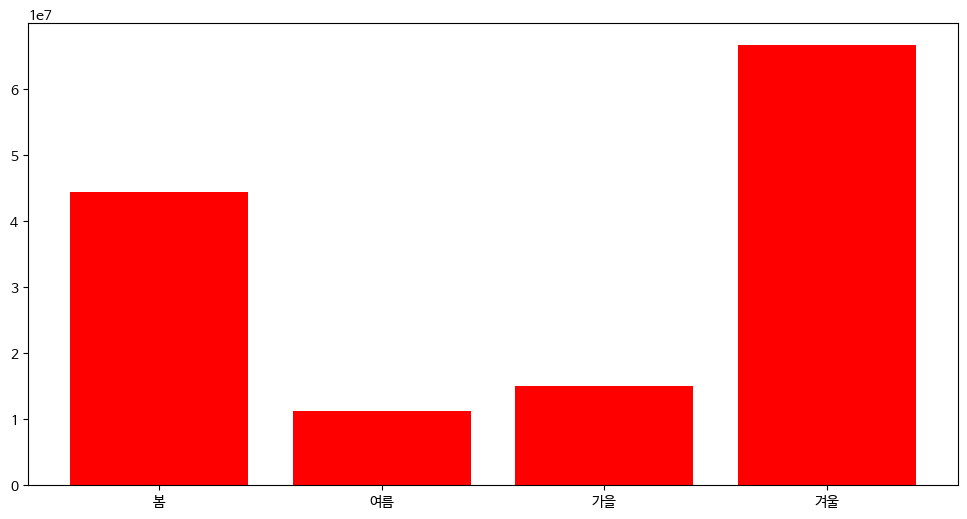

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['GUS'] = pd.to_numeric(df['GUS'], errors='coerce')
df['average_gas'] = df['GUS']

season_average = df.groupby('season')['average_gas'].mean().reset_index()

# 계절 순서 정렬 코드
season_order = ['봄', '여름', '가을', '겨울']
season_average = season_average.set_index('season').loc[season_order].reset_index()

x = season_average['season']
y = season_average['average_gas']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='red')